In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('./train_data_copy_final.csv',index_col = 0)
test_data = pd.read_csv('./test_data_copy_final.csv', index_col = 0)

train_result_df = pd.read_csv('./train_result_df_final.csv', index_col = 0)
test_result_df = pd.read_csv('./test_result_df_final.csv', index_col = 0)

In [3]:
train_data.head(2)

,EMAIL,activity_day_start,activity_class_5min_adj,activity_met_5min_df_adj,sleep_hr_5min_adj,sleep_hypnogram_5min_adj,sleep_rmssd_5min_adj,DIAG_NM
0,nia+279@rowan.kr,2020-10-19 04:00,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[63.0, 61.0, 59.0, 58.0, 58.0, 58.0, 56.0, 55....","[4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, ...","[18.0, 28.0, 25.0, 28.0, 34.0, 34.0, 35.0, 45....",1
1,nia+279@rowan.kr,2020-10-20 04:00,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.0, 51.0, 0.0, 51.0, 52.0, 52.0, 52.0, 52.0,...","[4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, ...","[0.0, 49.0, 0.0, 38.0, 51.0, 17.0, 18.0, 18.0,...",1


In [4]:
test_data.head(2)

,EMAIL,activity_day_start,activity_class_5min_adj,activity_met_5min_df_adj,sleep_hr_5min_adj,sleep_hypnogram_5min_adj,sleep_rmssd_5min_adj,DIAG_NM
0,nia+462@rowan.kr,2020-12-01 04:00,"[3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, ...","[2.0, 1.7, 1.4, 1.7, 1.7, 2.3, 2.5, 2.4, 2.5, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",1
1,nia+462@rowan.kr,2020-12-02 04:00,"[2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, ...","[1.2, 1.4, 2.7, 2.1, 1.9, 1.5, 2.3, 1.5, 1.6, ...","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....",1


In [5]:
train_result_df.head(2)

,EMAIL,true,pred
0,nia+003@rowan.kr,1,0
1,nia+005@rowan.kr,0,0


In [6]:
test_result_df.head(2)

,EMAIL,true,pred
0,nia+013@rowan.kr,1,0
1,nia+022@rowan.kr,1,1


In [7]:
print(confusion_matrix(train_result_df["true"], train_result_df["pred"]))
print(classification_report(train_result_df["true"], train_result_df["pred"]))

[[52 37]
 [16 33]]
              precision    recall  f1-score   support

           0       0.76      0.58      0.66        89
           1       0.47      0.67      0.55        49

    accuracy                           0.62       138
   macro avg       0.62      0.63      0.61       138
weighted avg       0.66      0.62      0.62       138



In [8]:
print(confusion_matrix(test_result_df["true"], test_result_df["pred"]))
print(classification_report(test_result_df["true"], test_result_df["pred"]))

[[6 5]
 [2 5]]
              precision    recall  f1-score   support

           0       0.75      0.55      0.63        11
           1       0.50      0.71      0.59         7

    accuracy                           0.61        18
   macro avg       0.62      0.63      0.61        18
weighted avg       0.65      0.61      0.61        18



## 실제 3클래스와 예측 결과 비교

In [9]:
total_label = pd.read_csv('./total_label.csv')
total_label.rename(columns = {'SAMPLE_EMAIL' : 'EMAIL'}, inplace = True)
total_label.head(2)

,EMAIL,DIAG_NM
0,nia+315@rowan.kr,CN
1,nia+014@rowan.kr,MCI


In [10]:
train_3_df = pd.merge(train_result_df, total_label, on='EMAIL', how='left')
test_3_df = pd.merge(test_result_df, total_label, on='EMAIL', how='left')

train_3_df.head(2)

,EMAIL,true,pred,DIAG_NM
0,nia+003@rowan.kr,1,0,MCI
1,nia+005@rowan.kr,0,0,CN


In [11]:
print(len(train_3_df[(train_3_df['true']==1)&(train_3_df['pred']==0)&(train_3_df['DIAG_NM']=='MCI')]))
print(len(train_3_df[(train_3_df['true']==1)&(train_3_df['pred']==0)&(train_3_df['DIAG_NM']=='Dem')]))

print(len(train_3_df[(train_3_df['true']==0)&(train_3_df['pred']==1)&(train_3_df['DIAG_NM']=='CN')]))
# 0으로 잘못 예측한 클래스 중 Dem은 1명이고, 15명는 MCI
# 1로 잘못 예측한 CN 37명

15
1
37


In [12]:
print(len(test_3_df[(test_3_df['true']==1)&(test_3_df['pred']==0)&(test_3_df['DIAG_NM']=='MCI')]))
print(len(test_3_df[(test_3_df['true']==1)&(test_3_df['pred']==0)&(test_3_df['DIAG_NM']=='Dem')]))

print(len(test_3_df[(test_3_df['true']==0)&(test_3_df['pred']==1)&(test_3_df['DIAG_NM']=='CN')]))
# 0으로 잘못 예측한 클래스 중 Dem은 0명이고, 2명은 MCI
# 1로 잘못 예측한 CN 5명

2
0
5


## 전처리

In [13]:
import ast

# 문자열을 리스트로 변환하고 각 요소를 숫자로 변환하는 함수
def convert_str_to_numeric_list(x):
    if isinstance(x, str):  # 문자열인 경우
        try:
            # 문자열을 리스트로 변환 후 각 요소를 숫자로 변환
            return [float(i) for i in ast.literal_eval(x)]  # 실수로 변환하고 다시 리스트 만들기
        except:
            return []  # 변환 실패 시 빈 리스트 반환
    return x  # 이미 리스트인 경우 그대로 반환

In [14]:
# 변수 타입 확인
def check_data_types(df):
    feature_columns = ['activity_class_5min_adj', 'activity_met_5min_df_adj',
                        'sleep_hr_5min_adj',
                        'sleep_hypnogram_5min_adj', 'sleep_rmssd_5min_adj']
    for col in feature_columns:
        print(f"Checking types in column: {col}")
        # 리스트 내부의 데이터 타입을 확인
        types = df[col].apply(lambda x: type(x) if isinstance(x, object) else None).unique()
        print(f"Unique types in column {col}: {types}")

In [15]:
feature_columns = ['activity_class_5min_adj', 'activity_met_5min_df_adj',
                    'sleep_hr_5min_adj',
                        'sleep_hypnogram_5min_adj', 'sleep_rmssd_5min_adj']

train_data[feature_columns] = train_data[feature_columns].applymap(convert_str_to_numeric_list)
check_data_types(train_data)

test_data[feature_columns] = test_data[feature_columns].applymap(convert_str_to_numeric_list)
check_data_types(test_data)

Checking types in column: activity_class_5min_adj
Unique types in column activity_class_5min_adj: [<class 'list'>]
Checking types in column: activity_met_5min_df_adj
Unique types in column activity_met_5min_df_adj: [<class 'list'>]
Checking types in column: sleep_hr_5min_adj
Unique types in column sleep_hr_5min_adj: [<class 'list'>]
Checking types in column: sleep_hypnogram_5min_adj
Unique types in column sleep_hypnogram_5min_adj: [<class 'list'>]
Checking types in column: sleep_rmssd_5min_adj
Unique types in column sleep_rmssd_5min_adj: [<class 'list'>]
Checking types in column: activity_class_5min_adj
Unique types in column activity_class_5min_adj: [<class 'list'>]
Checking types in column: activity_met_5min_df_adj
Unique types in column activity_met_5min_df_adj: [<class 'list'>]
Checking types in column: sleep_hr_5min_adj
Unique types in column sleep_hr_5min_adj: [<class 'list'>]
Checking types in column: sleep_hypnogram_5min_adj
Unique types in column sleep_hypnogram_5min_adj: [<cl

## 신뢰구간 라인플롯(HR, RMSSD)

In [16]:
# 1. 예측 결과를 포함한 train_data 복사본
train_data_copy = train_data.copy()
train_data_copy = train_data_copy[train_data_copy['EMAIL'].isin(train_result_df['EMAIL'])] #실제 학습에 사용한 참가자만

# 2. 각 참가자의 예측 결과를 원본 데이터에 붙이기
pred_map = train_result_df.set_index('EMAIL')['pred'].to_dict()
true_map = train_result_df.set_index('EMAIL')['true'].to_dict()

train_data_copy['pred'] = train_data_copy['EMAIL'].map(pred_map)
train_data_copy['true'] = train_data_copy['EMAIL'].map(true_map)

# 3. 조건에 따라 4가지 경우의 수 추출
tp_data = train_data_copy[(train_data_copy['true'] == 1) & (train_data_copy['pred'] == 1)]
tn_data = train_data_copy[(train_data_copy['true'] == 0) & (train_data_copy['pred'] == 0)]
fp_data = train_data_copy[(train_data_copy['true'] == 0) & (train_data_copy['pred'] == 1)]
fn_data = train_data_copy[(train_data_copy['true'] == 1) & (train_data_copy['pred'] == 0)]

In [17]:
def plot_avg_time_series_with_shading(feature_name, df, title):
    values = []
    for row in df[feature_name]:
        if isinstance(row, list) and len(row) == 288:
            values.append(row)
    values = np.array(values)
    if len(values) > 0:
        avg_series = np.mean(values, axis=0)
        std_series = np.std(values, axis=0)

        n = len(values)  # 샘플 개수
        std_err = std_series / np.sqrt(n) #표준오차 계산
        conf_interval = stats.t.ppf(0.975, df=n-1) * std_err  # t분포 95% 신뢰구간 계수

        plt.plot(avg_series, label=title)
        plt.fill_between(range(288), avg_series - conf_interval, avg_series + conf_interval, alpha=0.2) #신뢰구간을 표시하는 음영(fill_between) 추가

        '''
        plt.plot(avg_series, label=title)
        plt.fill_between(range(288), avg_series - std_series, avg_series + std_series, alpha=0.2) #표준편차를 표시하는 음영 추가
        '''

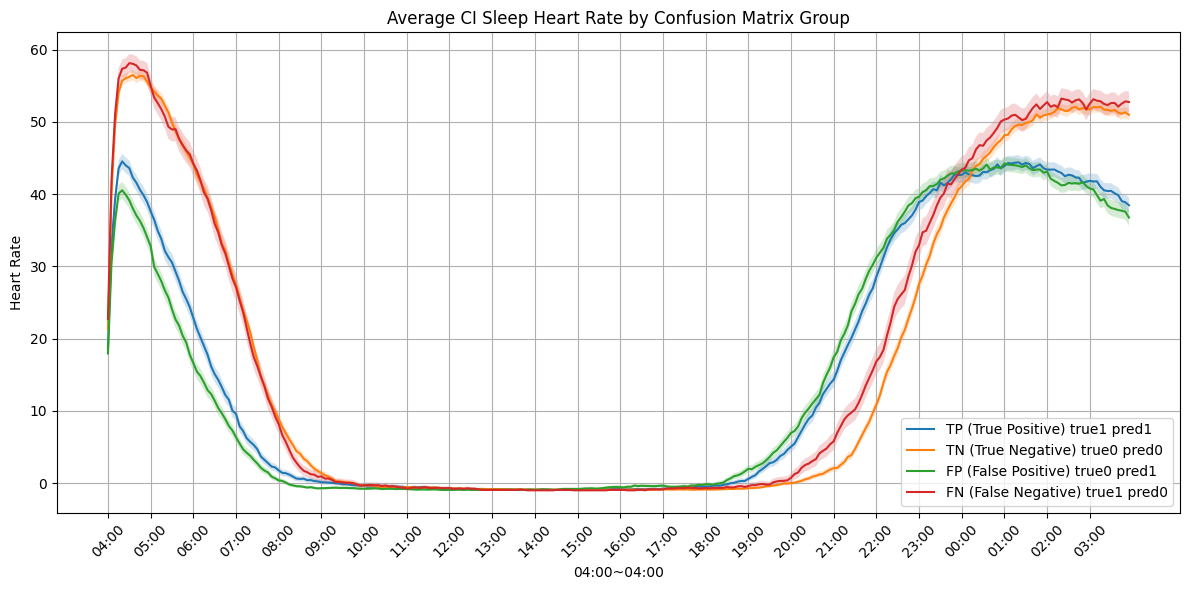

In [18]:
plt.figure(figsize=(12, 6))
plot_avg_time_series_with_shading('sleep_hr_5min_adj', tp_data, 'TP (True Positive) true1 pred1')
plot_avg_time_series_with_shading('sleep_hr_5min_adj', tn_data, 'TN (True Negative) true0 pred0')
plot_avg_time_series_with_shading('sleep_hr_5min_adj', fp_data, 'FP (False Positive) true0 pred1')
plot_avg_time_series_with_shading('sleep_hr_5min_adj', fn_data, 'FN (False Negative) true1 pred0')

# xticks 실제 시간으로 바꾸기
xtick_positions = list(range(0, 288, 12)) # 눈금 만들기
start_time = datetime.datetime.strptime("04:00", "%H:%M") #문자열을 datetime으로 전환
xtick_labels = [(start_time + datetime.timedelta(minutes=5 * i)).strftime("%H:%M") for i in xtick_positions] #4시부터 5분씩 더하고 datetime으로 표시

plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45) # 눈금과 눈금의 라벨을 따로 설정한다
plt.xlabel('04:00~04:00')
plt.ylabel('Heart Rate')
plt.title('Average CI Sleep Heart Rate by Confusion Matrix Group')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

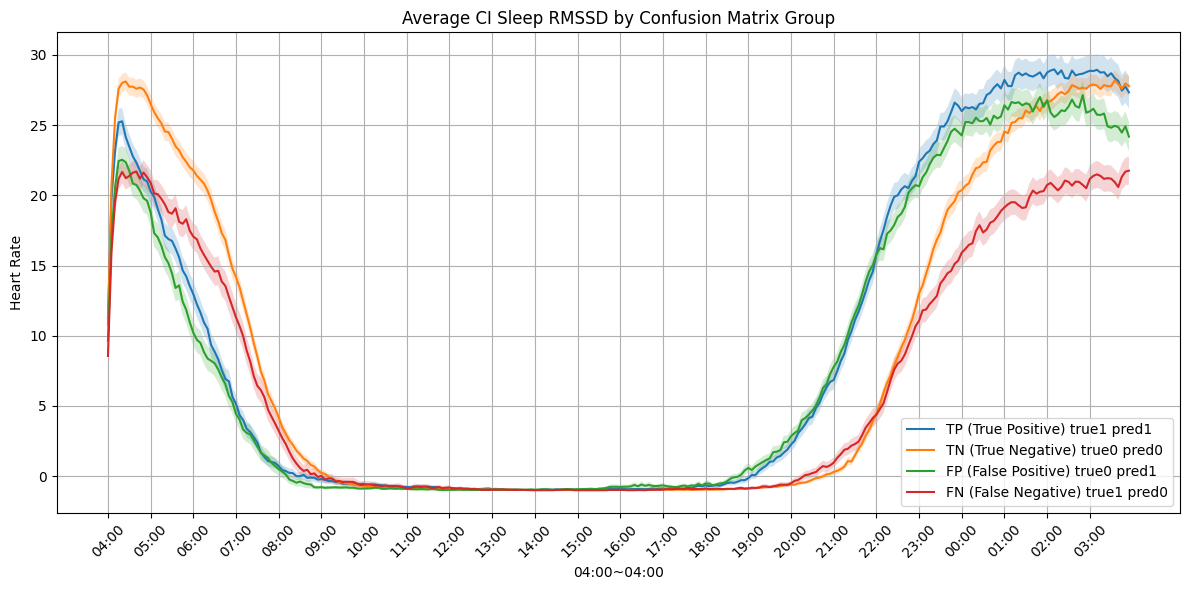

In [19]:
plt.figure(figsize=(12, 6))
plot_avg_time_series_with_shading('sleep_rmssd_5min_adj', tp_data, 'TP (True Positive) true1 pred1')
plot_avg_time_series_with_shading('sleep_rmssd_5min_adj', tn_data, 'TN (True Negative) true0 pred0')
plot_avg_time_series_with_shading('sleep_rmssd_5min_adj', fp_data, 'FP (False Positive) true0 pred1')
plot_avg_time_series_with_shading('sleep_rmssd_5min_adj', fn_data, 'FN (False Negative) true1 pred0')

# xticks 실제 시간으로 바꾸기
xtick_positions = list(range(0, 288, 12)) # 눈금 만들기
start_time = datetime.datetime.strptime("04:00", "%H:%M") #문자열을 datetime으로 전환
xtick_labels = [(start_time + datetime.timedelta(minutes=5 * i)).strftime("%H:%M") for i in xtick_positions] #4시부터 5분씩 더하고 datetime으로 표시

plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45) # 눈금과 눈금의 라벨을 따로 설정한다
plt.xlabel('04:00~04:00')
plt.ylabel('Heart Rate')
plt.title('Average CI Sleep RMSSD by Confusion Matrix Group')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 단계별 비율(HYPNOGRAM)

In [20]:
# 특정 그룹의 hypnogram 시계열을 스택 비율로 변환
def plot_hypnogram_stage_proportions(df, title):
    values = []
    for row in df['sleep_hypnogram_5min_adj']:
        if isinstance(row, list) and len(row) == 288:
            values.append(row)
    values = np.array(values)

    proportions = [] #단계별 비율 계산
    for stage in [1, 2, 3, 4]:  # Deep, Light, REM, Awake 순서
        proportions.append(np.mean(values == stage, axis=0))
    proportions = np.array(proportions)

    plt.stackplot(range(288), proportions, labels=['Deep', 'Light', 'REM', 'Awake'], alpha=0.7) #시계열 누적 비율 보여줌

    xtick_positions = list(range(0, 288, 12))
    start_time = datetime.datetime.strptime("04:00", "%H:%M")
    xtick_labels = [(start_time + datetime.timedelta(minutes=5 * i)).strftime("%H:%M") for i in xtick_positions]
    plt.xticks(ticks=xtick_positions, labels=xtick_labels, rotation=45)

    y_ticks = np.arange(0, 1.1, 0.1)
    plt.yticks(ticks = y_ticks)
    plt.title(title)
    plt.xlabel('04:00~04:00')
    plt.ylabel('Proportion of Stage')
    plt.legend(loc='upper right')


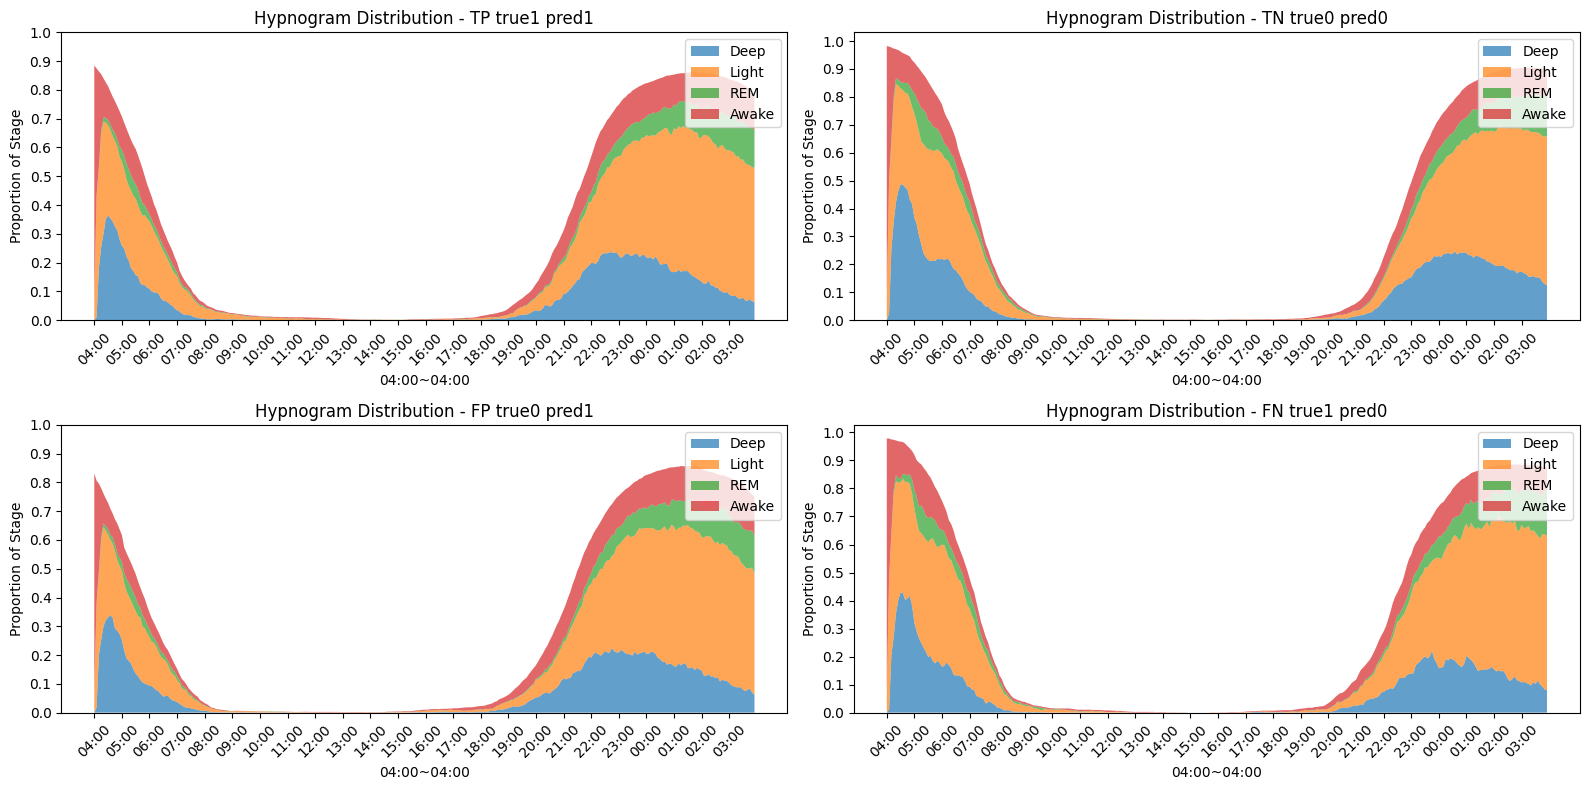

In [21]:
plt.figure(figsize=(16, 8))
for i, (df_group, label) in enumerate(zip([tp_data, tn_data, fp_data, fn_data],
                                           ['TP true1 pred1', 'TN true0 pred0', 'FP true0 pred1', 'FN true1 pred0'])):
    plt.subplot(2, 2, i+1)
    plot_hypnogram_stage_proportions(df_group, f"Hypnogram Distribution - {label}")
plt.tight_layout()
plt.show()

### 각 단계별 면적 수치로 계산

In [22]:
def plot_stage_area_bar(df, title, start_index=0, end_index=288):
    """
    start_index, end_index: 5분 단위 인덱스 범위 (0~287)
    """
    values = []
    for row in df['sleep_hypnogram_5min_adj']:
        if isinstance(row, list) and len(row) == 288:
            values.append(row)
    values = np.array(values)

    # 4시 이전 범위만
    if start_index < end_index:
        values = values[:, start_index:end_index]
    else:
        # 4시 이후 범위 : 두 부분을 붙임
        values = np.concatenate([values[:, start_index:], values[:, :end_index]], axis=1)

    stage_areas = []
    for stage in range(1, 5):  # 1: Deep, 2: Light, 3: REM, 4: Awake
        stage_proportion = np.mean(values == stage, axis=0) #5분마다 4단계에 대한 확률이 나옴
        total_area = np.sum(stage_proportion) # 5분마다 나눠져 있는 것을 각 단계끼리 합치기
        stage_areas.append(total_area)

    stage_labels = ['Deep', 'Light', 'REM', 'Awake']
    stage_colors = ['#4B8BBE', '#306998', '#FFE873', '#FF6F61']

    plt.figure(figsize=(6, 4))
    bars = plt.bar(stage_labels, stage_areas, color=stage_colors) #bars는 반복가능
    plt.title(title)
    plt.ylabel('Total Area (sum of proportions over selected time)')
    plt.ylim(0, max(stage_areas) * 1.1)

    # annotate
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 5),  # offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()


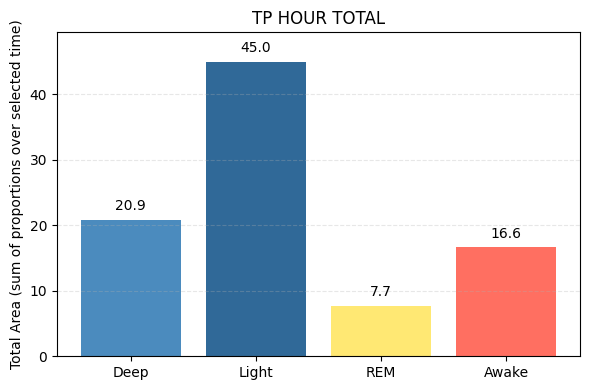

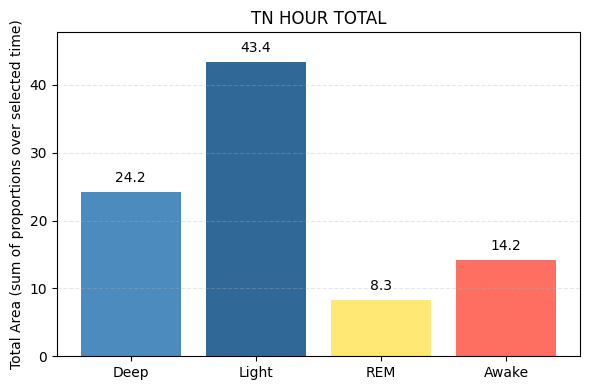

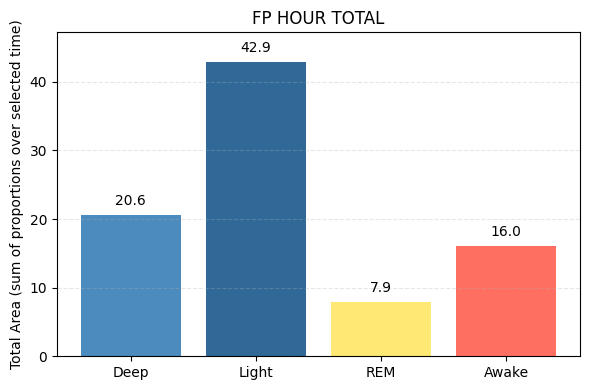

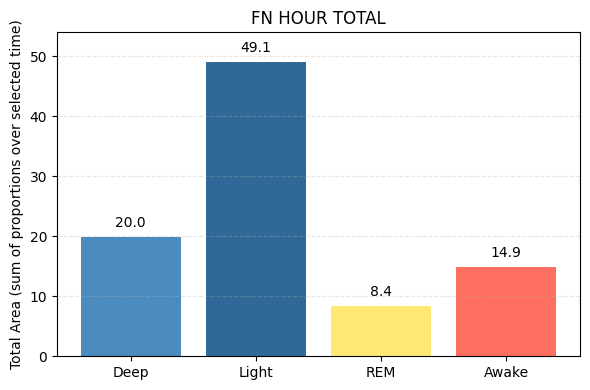

In [23]:
# tp_data, tn_data, fp_data, fn_data
plot_stage_area_bar(tp_data, "TP HOUR TOTAL", start_index=0, end_index=288)
plot_stage_area_bar(tn_data, "TN HOUR TOTAL", start_index=0, end_index=288)
plot_stage_area_bar(fp_data, "FP HOUR TOTAL", start_index=0, end_index=288)
plot_stage_area_bar(fn_data, "FN HOUR TOTAL", start_index=0, end_index=288)

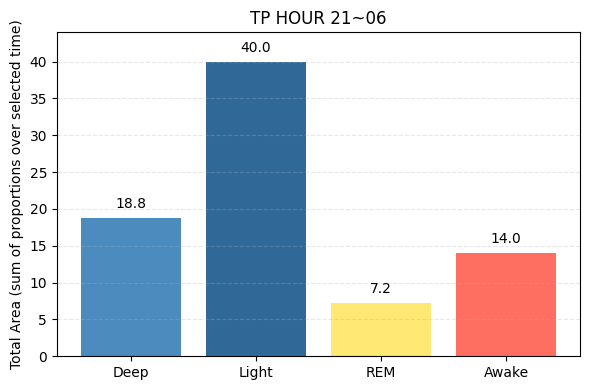

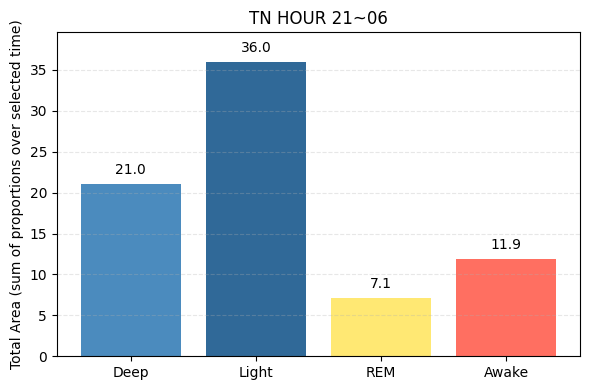

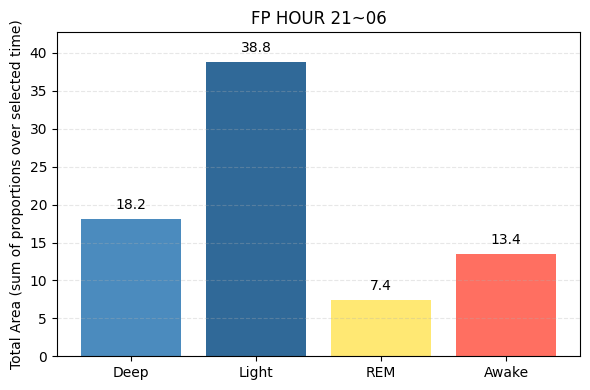

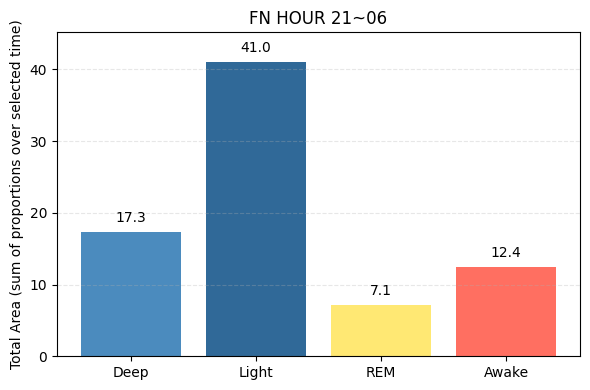

In [24]:
plot_stage_area_bar(tp_data, "TP HOUR 21~06", start_index=204, end_index=24)
plot_stage_area_bar(tn_data, "TN HOUR 21~06", start_index=204, end_index=24)
plot_stage_area_bar(fp_data, "FP HOUR 21~06", start_index=204, end_index=24)
plot_stage_area_bar(fn_data, "FN HOUR 21~06", start_index=204, end_index=24)
#TN은 Deep이 가장 크다는 차이점 존재
# awake는 TN과 FN이 약간 더 작고(14% 내외), TP와 FP가 약간 더 크다(16% 내외)
# REM은 차이가 거의 없고, LIGHT는 규칙성을 착지 어려움